In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import svm
from sklearn.model_selection import train_test_split as tts,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay as cmd,classification_report as cr
from sklearn.preprocessing import MinMaxScaler as mms

In [2]:
data=pd.read_csv('social.csv',delimiter=',')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


##### Encoding Gender columns

In [3]:
data['Gender']=data['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [4]:
len(data['User ID'].unique())-data.shape[0] #Unique ids meaning , no duplicate candidates

0

In [5]:
# Dropping id column since its irrelevant for us ,
data=data.drop('User ID',axis=1)

### Spliting the data {train/test}

In [6]:
inputs=data.drop('Purchased',axis=1)
target=data['Purchased']
x_train,x_test,y_train,y_test=tts(inputs,target,test_size=0.2,random_state=42,stratify=target)

##### Rescalling inputs to [-1,1]

In [7]:
mms=mms(feature_range=(-1,1))
x_train_scaled=mms.fit_transform(x_train)
x_test_scaled=mms.transform(x_test)

### Support Vector Classifier

In [8]:
clf=svm.SVC(kernel='poly',C=10)
clf.fit(x_train_scaled,y_train)

SVC(C=10, kernel='poly')

In [9]:
y_predict=clf.predict(x_test_scaled)

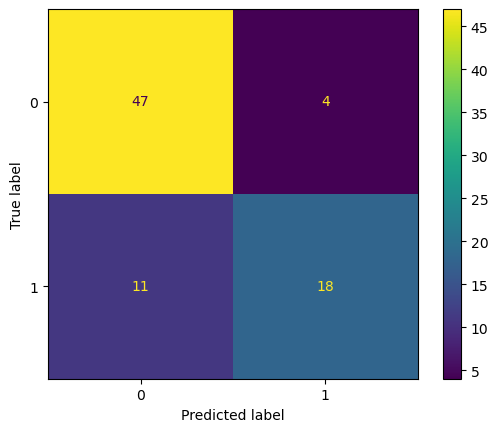

In [10]:
sns.reset_orig()
cmd.from_predictions(y_test,y_predict,display_labels=clf.classes_)
plt.show()

In [11]:
print(cr(y_test,y_predict,target_names=['ignored','purshased']))

              precision    recall  f1-score   support

     ignored       0.81      0.92      0.86        51
   purshased       0.82      0.62      0.71        29

    accuracy                           0.81        80
   macro avg       0.81      0.77      0.78        80
weighted avg       0.81      0.81      0.81        80



### Hyperparameter Tunning with gridsearchCV

In [12]:
tuned_parameters=[
        {'kernel':['linear'],'C':[1,10]},
        {'kernel':['poly'],'C':[1,10]},
        {'kernel':['rbf'],'gamma':[1e-3,1e-4],'C':[1,10]}
]
scores=['precision','recall']

In [13]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_scaled, y_train)
    print('--------------------------------------------------------------')
    print("Best para-set:",clf.best_params_)
    print('--------------------------------------------------------------')
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print('--------------------------------------------------------------')

# Tuning hyper-parameters for precision


C:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

--------------------------------------------------------------
Best para-set: {'C': 10, 'kernel': 'poly'}
--------------------------------------------------------------
Grid scores on development set:
0.858 (+/-0.140) for {'C': 1, 'kernel': 'linear'}
0.841 (+/-0.125) for {'C': 10, 'kernel': 'linear'}
0.854 (+/-0.111) for {'C': 1, 'kernel': 'poly'}
0.876 (+/-0.121) for {'C': 10, 'kernel': 'poly'}
0.322 (+/-0.006) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.322 (+/-0.006) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.796 (+/-0.150) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.322 (+/-0.006) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
--------------------------------------------------------------
# Tuning hyper-parameters for recall
--------------------------------------------------------------
Best para-set: {'C': 10, 'kernel': 'poly'}
--------------------------------------------------------------
Grid scores on development set:
0.810 (+/-0.099) for {'C': 1, 'kernel': 'lin

In [84]:
def devide_target(x,y):
    x=np.array(x)
    y=np.array(y)
    x_purshase=x[y==1]
    x_ignored=x[y==0]
    return x_purshase,x_ignored
x_purshase,x_ignored=devide_target(x_test,y_test)

In [83]:
'''def devide_gender(x,gender):
    x_male=x[gender[:,:1]==1]
    x_female=x[gender==0]
    return x_male,x_female
x_male_purshase,x_female_purshase=devide_gender(gender_purshase,newx_purshase)
x_male_ignored,x_female_ignored=devide_gender(x_ignored[:,1:],x_ignored[:,1])
'''

'def devide_gender(x,gender):\n    x_male=x[gender[:,:1]==1]\n    x_female=x[gender==0]\n    return x_male,x_female\nx_male_purshase,x_female_purshase=devide_gender(gender_purshase,newx_purshase)\nx_male_ignored,x_female_ignored=devide_gender(x_ignored[:,1:],x_ignored[:,1])\n'

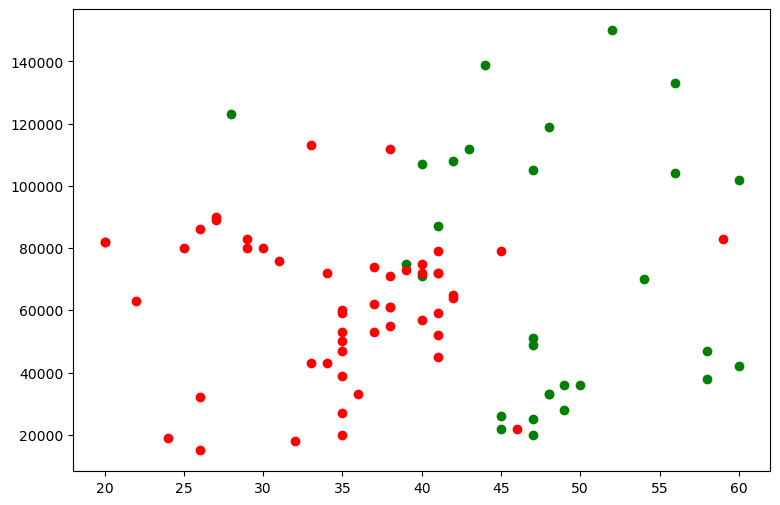

In [85]:
plt.figure(figsize=(9,6))
plt.scatter(x_purshase[:,1],x_purshase[:,2],color='green')
plt.scatter(x_ignored[:,1],x_ignored[:,2],color='red')
plt.show()

In [86]:
x_purshase,x_ignored=devide_target(x_test,y_predict)

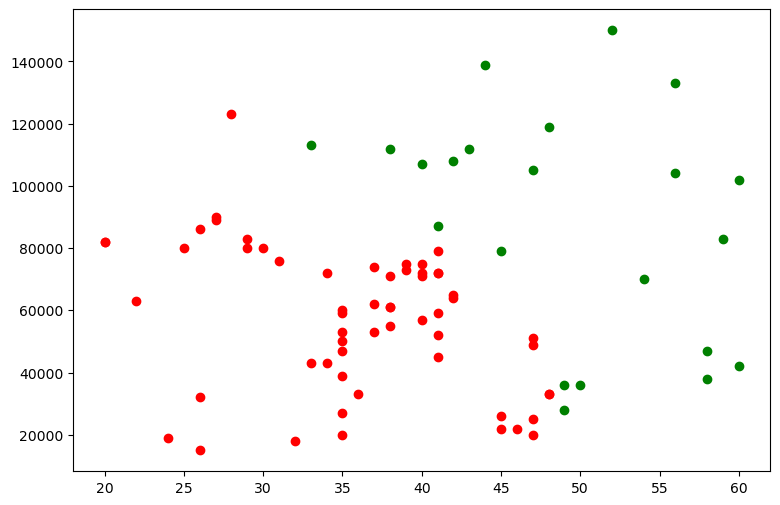

In [87]:
plt.figure(figsize=(9,6))
plt.scatter(x_purshase[:,1],x_purshase[:,2],color='green')
plt.scatter(x_ignored[:,1],x_ignored[:,2],color='red')
plt.show()